In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [2]:
image_dir = ".\\covid19dataset"
image_dir

'.\\covid19dataset'

In [3]:
import pathlib 
image_dir = pathlib.Path(image_dir)
image_dir

WindowsPath('covid19dataset')

In [4]:
all_image_dir = list(image_dir.glob('**\*.png'))
all_image_dir[-5:]

[WindowsPath('covid19dataset/Viral_Pneumonia/images/Viral Pneumonia-995.png'),
 WindowsPath('covid19dataset/Viral_Pneumonia/images/Viral Pneumonia-996.png'),
 WindowsPath('covid19dataset/Viral_Pneumonia/images/Viral Pneumonia-997.png'),
 WindowsPath('covid19dataset/Viral_Pneumonia/images/Viral Pneumonia-998.png'),
 WindowsPath('covid19dataset/Viral_Pneumonia/images/Viral Pneumonia-999.png')]

In [5]:
covid_dir = list(image_dir.glob('COVID/images/*'))
# lung_opacity_dir = list(image_dir.glob('Lung_Opacity/images/*'))
normal_dir = list(image_dir.glob('Normal/images/*'))
pneumonia_dir = list(image_dir.glob('Viral_Pneumonia/images/*'))

In [6]:
# EXPLORING DATA SIZE ....
print('Covid data size:', len(covid_dir))
# print('Lung Opacity data size:', len(lung_opacity_dir))
print('Normal data Size' , len(normal_dir))
print('Pneumonia data size', len(pneumonia_dir))

# print('Total Image Datase ------->>>>>>>' , len(all_image_dir))
print('Total Image Datase ------->>>>>>>' , len(covid_dir) + len(pneumonia_dir) + len(normal_dir) )

Covid data size: 3616
Normal data Size 10192
Pneumonia data size 1345
Total Image Datase ------->>>>>>> 15153


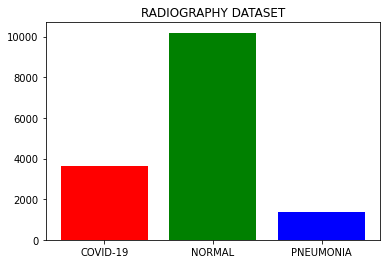

In [7]:
x_item = ['COVID-19' , 'NORMAL', 'PNEUMONIA']
y_item = [len(covid_dir) , len(normal_dir) , len(pneumonia_dir)]

plt.title('RADIOGRAPHY DATASET')
plt.bar(x_item, y_item, color=['red', 'green', 'blue'])
plt.show()


In [8]:
# VISUALIZAING IMAGE ........

In [9]:
covid_image = PIL.Image.open(str(covid_dir[0]))
# lung_opacity = PIL.Image.open(str(lung_opacity_dir[0]))
normal = PIL.Image.open(str(normal_dir[0]))
pneumonai_image = PIL.Image.open(str(pneumonia_dir[0]))

images_ = [covid_image, normal, pneumonai_image]

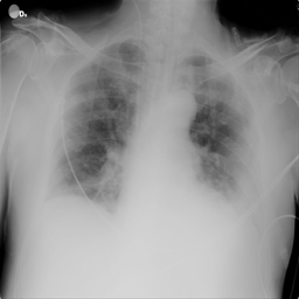

In [10]:
images_[0]

In [11]:
#  CREATING A DICTIONARY FOR IMAGE AND LABELS......

In [12]:
covid_image_dic ={
    'covid':covid_dir,
    'normal':normal_dir,
#     'lung_opacity':lung_opacity_dir,   
    'pneumonia':pneumonia_dir
}

In [13]:
covid_label_dict = {
    "covid":0,
    'normal':1,
#     'lung_opacity':2,
    'pneumonia':2
}

In [14]:
image = cv2.imread(str(covid_image_dic['covid'][0]))
image.shape

(299, 299, 3)

In [15]:
# VISUALIZING IMAGE FROM ALL CLASS 

In [16]:
# LOADING DATA USING THE DICTIONARY

In [17]:
X , y = [], []

# lopping through the image dictionary 
for title, paths in covid_image_dic.items():
    print(f'Title :{title} <<<<<------------->>>>> Data Size: {len(paths)}')
    for path in paths:
        image = cv2.imread(str(path))
#         scale_image = image/255
        r_image = cv2.resize(image, (180,180))
        X.append(r_image)
        y.append(covid_label_dict[title])

print("Execution completed.....................................")

Title :covid <<<<<------------->>>>> Data Size: 3616
Title :normal <<<<<------------->>>>> Data Size: 10192
Title :pneumonia <<<<<------------->>>>> Data Size: 1345
Execution completed.....................................


In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
# VISUALIZAING DATASET FROM ALL CLASS

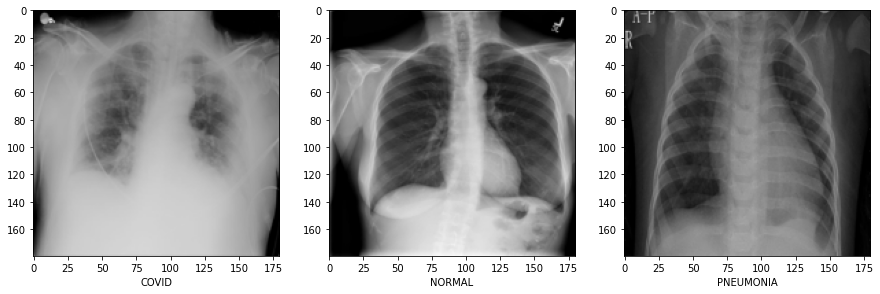

In [20]:
# covid = covid_image_dic['covid'][0]
# normal  = covid_image_dic['normal'][0]
# lung  = covid_image_dic['lung_opacity'][0]
# monia = covid_image_dic['pneumonia'][0]
X_image = [X[0], X[12000], X[14000]]

plt.figure(figsize=(15,15))

label = ['COVID', 'NORMAL' , 'PNEUMONIA']
for i in range(3):
# plt.title('HOG FEATURE')
    plt.subplot(1,3, i+1)
    plt.imshow(X_image[i], cmap='gray')
    plt.xlabel(label[i])
    
plt.show()

# plt.imshow(X_image[0], cmap='gray')

In [21]:
def getLBPimage(gray_image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)
    
    == Output ==  
    imgLBP : LBP converted image of the same shape as 
    '''
    
    ### Step 0: Step 0: Convert an image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3 
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()
            ### Step 2: **Binary operation**:
            img01_vector = np.delete(img01_vector,4)
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

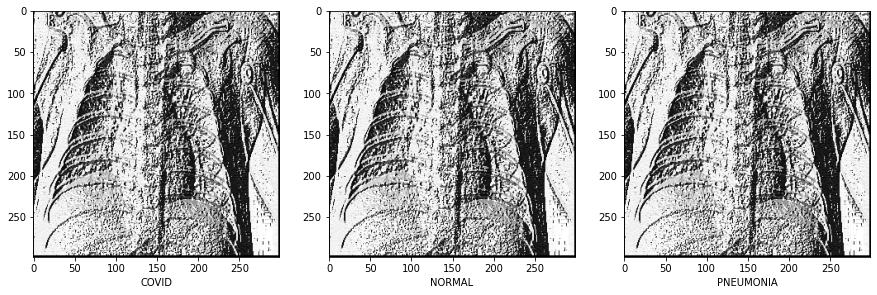

In [24]:
lbp_image = [getLBPimage(X[0]), getLBPimage(X[12000]),getLBPimage(X[14000])]
# plt.imshow(lbp_image)

plt.figure(figsize=(15,15))
label = ['COVID', 'NORMAL'  , 'PNEUMONIA']
for i in range(3):
    plt.subplot(1,3, i+1)
    plt.imshow(lbp_image[i], cmap='gray'),
    plt.xlabel(label[i])
    
plt.show()

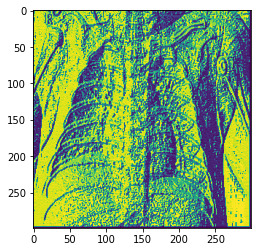

In [25]:
lbp_image = getLBPimage(X[0])
plt.imshow(lbp_image)

In [28]:
lbp_features = [] 
# for image in X:
#     lbp_img = getLBPimage(image)
#     lbp_features.append(lbp_img)

print("feature extraction completed...")

feature extraction completed...


In [29]:
#  APPLYING HISTOGRAM OF ORIENTED GRADIENT (HOG)..... TO THE ORIGINAL DATASET

# ANN MODEL 

In [19]:

ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(180,180,3)),
    keras.layers.Dense(90, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense (Dense)               (None, 90)                8748090   
                                                                 
 dense_1 (Dense)             (None, 3)                 273       
                                                                 
Total params: 8,748,363
Trainable params: 8,748,363
Non-trainable params: 0
_________________________________________________________________


In [24]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.25, random_state=0)


In [25]:
print('x train shape' , X_train.shape)
print('y train shape' , y_train.shape)
print('x test shape', X_test.shape)
print('y test shape', y_test.shape)

x train shape (11364, 180, 180, 3)
y train shape (11364,)
x test shape (3789, 180, 180, 3)
y test shape (3789,)


In [23]:
ann_model.fit(X_train, y_train, epochs=6)

Epoch 1/6
356/356 [==============================] - 21s 60ms/step - loss: 460.7820 - accuracy: 0.7386
Epoch 2/6
356/356 [==============================] - 21s 60ms/step - loss: 247.4960 - accuracy: 0.7750
Epoch 3/6
356/356 [==============================] - 21s 60ms/step - loss: 248.6567 - accuracy: 0.7664
Epoch 4/6
356/356 [==============================] - 22s 61ms/step - loss: 171.7358 - accuracy: 0.7744
Epoch 5/6
356/356 [==============================] - 22s 61ms/step - loss: 112.7928 - accuracy: 0.7938
Epoch 6/6
356/356 [==============================] - 22s 62ms/step - loss: 95.0717 - accuracy: 0.7929


In [24]:
ann_model.evaluate(X_test, y_test)

119/119 [==============================] - 2s 20ms/step - loss: 159.9576 - accuracy: 0.6010


[159.95762634277344, 0.6009501218795776]

              precision    recall  f1-score   support

           0       0.37      0.98      0.54       848
           1       0.94      0.49      0.64      2609
           2       0.92      0.53      0.67       332

    accuracy                           0.60      3789
   macro avg       0.74      0.66      0.62      3789
weighted avg       0.81      0.60      0.62      3789



<AxesSubplot:>

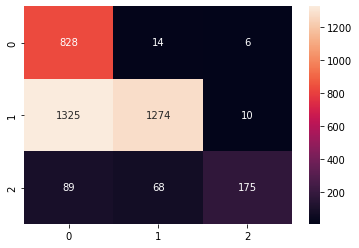

In [25]:
from sklearn import metrics 
import seaborn as sb
import pandas as pd

y_predict = ann_model.predict(X_test)
# np.argmax(y_predict[0])
y_predic = [np.argmax(prob) for prob in y_predict]

print(metrics.classification_report(y_test, y_predic) )
cm =  metrics.confusion_matrix(y_test, y_predic)

dataframe = pd.DataFrame(cm)
sb.heatmap(dataframe, annot=True , fmt='d')

# CNN MODEL

In [26]:
cnn_model = tf.keras.Sequential([
    #   cnn and max pooling layer 1
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(180,180,3)),
    keras.layers.MaxPooling2D(),
     #   cnn and max pooling layer 2  
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
#     #   cnn and max pooling layer 3  
#     keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
#     keras.layers.MaxPooling2D(),
    
    keras.layers.Dropout(0.50),
    # neuron network dense
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])



cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 45, 45, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 64800)            

In [27]:
cnn_model.fit(X_train, y_train, batch_size=64, epochs=6)

Epoch 1/6
178/178 [==============================] - 239s 1s/step - loss: 11.1148 - accuracy: 0.7548
Epoch 2/6
178/178 [==============================] - 265s 1s/step - loss: 0.3859 - accuracy: 0.8490
Epoch 3/6
178/178 [==============================] - 226s 1s/step - loss: 0.3137 - accuracy: 0.8808
Epoch 4/6
178/178 [==============================] - 188s 1s/step - loss: 0.2759 - accuracy: 0.8936
Epoch 5/6
178/178 [==============================] - 182s 1s/step - loss: 0.2392 - accuracy: 0.9135
Epoch 6/6
178/178 [==============================] - 176s 989ms/step - loss: 0.2083 - accuracy: 0.9207


In [28]:
cnn_model.evaluate(X_test, y_test)

119/119 [==============================] - 24s 194ms/step - loss: 0.2740 - accuracy: 0.9105


[0.27402955293655396, 0.9105305075645447]

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       848
           1       0.94      0.94      0.94      2609
           2       0.94      0.89      0.91       332

    accuracy                           0.91      3789
   macro avg       0.90      0.89      0.89      3789
weighted avg       0.91      0.91      0.91      3789



<AxesSubplot:>

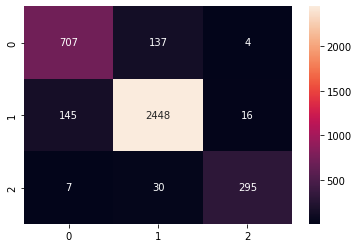

In [29]:
from sklearn import metrics 
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

y_predict = cnn_model.predict(X_test)
# np.argmax(y_predict[0])
y_predic = [np.argmax(prob) for prob in y_predict]

print(metrics.classification_report(y_test, y_predic) )
cm =  metrics.confusion_matrix(y_test, y_predic)

plt.ylabel('Truth')
plt.xlabel('Prediction')
dataframe = pd.DataFrame(cm)
sb.heatmap(dataframe, annot=True , fmt='d')

# CNN  & LBP MODEL 

In [35]:
cnn_lbp_model = tf.keras.Sequential([
    #   cnn and max pooling layer 1
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(180,180,3)),
    keras.layers.MaxPooling2D(),
    
    #   cnn and max pooling layer 2  
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    #   cnn and max pooling layer 3  
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
        
     #   cnn and max pooling layer 4  
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Dropout(0.20),
    
    # neuron network dense
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])



cnn_lbp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_lbp_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 22, 22, 64)      

In [36]:
cnn_lbp_model.fit(X_train, y_train, batch_size=64, epochs=6)

Epoch 1/6
178/178 [==============================] - 262s 1s/step - loss: 3.1773 - accuracy: 0.8074
Epoch 2/6
178/178 [==============================] - 244s 1s/step - loss: 0.2472 - accuracy: 0.9018
Epoch 3/6
178/178 [==============================] - 241s 1s/step - loss: 0.1785 - accuracy: 0.9336
Epoch 4/6
178/178 [==============================] - 248s 1s/step - loss: 0.1482 - accuracy: 0.9442
Epoch 5/6
178/178 [==============================] - 249s 1s/step - loss: 0.1169 - accuracy: 0.9555
Epoch 6/6
178/178 [==============================] - 248s 1s/step - loss: 0.0981 - accuracy: 0.9647


In [37]:
cnn_lbp_model.evaluate(X_test, y_test)

119/119 [==============================] - 26s 215ms/step - loss: 0.1715 - accuracy: 0.9419


[0.17152731120586395, 0.9419372081756592]

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       848
           1       0.94      0.98      0.96      2609
           2       0.95      0.89      0.92       332

    accuracy                           0.94      3789
   macro avg       0.94      0.91      0.92      3789
weighted avg       0.94      0.94      0.94      3789



<AxesSubplot:>

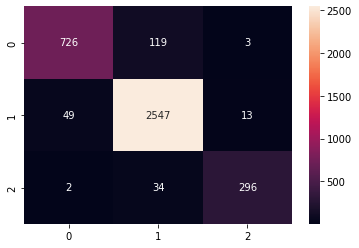

In [41]:
from sklearn import metrics 
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

y_predict = cnn_lbp_model.predict(X_test)
# np.argmax(y_predict[0])
y_predic = [np.argmax(prob) for prob in y_predict]

print(metrics.classification_report(y_test, y_predic) )
cm =  metrics.confusion_matrix(y_test, y_predic)

plt.ylabel('Truth')
plt.xlabel('Prediction')
dataframe = pd.DataFrame(cm)
sb.heatmap(dataframe, annot=True , fmt='d')


In [51]:
from skimage.feature import hog

In [52]:
# its required to reshape image to 128,64
resized_images  = [] 
for image in X:
    img = cv2.resize(image, (64,128))
    resized_images.append(img)
    
print('Resize Execution Completed.....')

Resize Execution Completed.....


In [53]:
len(resized_images)

15153

In [54]:
# CREATING HOG FEATURES FOR ALL IMAGES IN ALL CLASSES

In [55]:
#  after image is resized now let create HOG feature from each resize images
hog_features = []
for r_image in resized_images:
    fd , hog_feature_image = hog(r_image, orientations=9 , pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True, multichannel=True)
    hog_features.append(hog_feature_image)

print('HOG Features extracted completly...................')

C:\Users\binary\AppData\Local\Temp\ipykernel_14884\2533010752.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd , hog_feature_image = hog(r_image, orientations=9 , pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True, multichannel=True)


KeyboardInterrupt: 

In [19]:
#  HOG AND SCALE IMAGES.......VISUALIZING

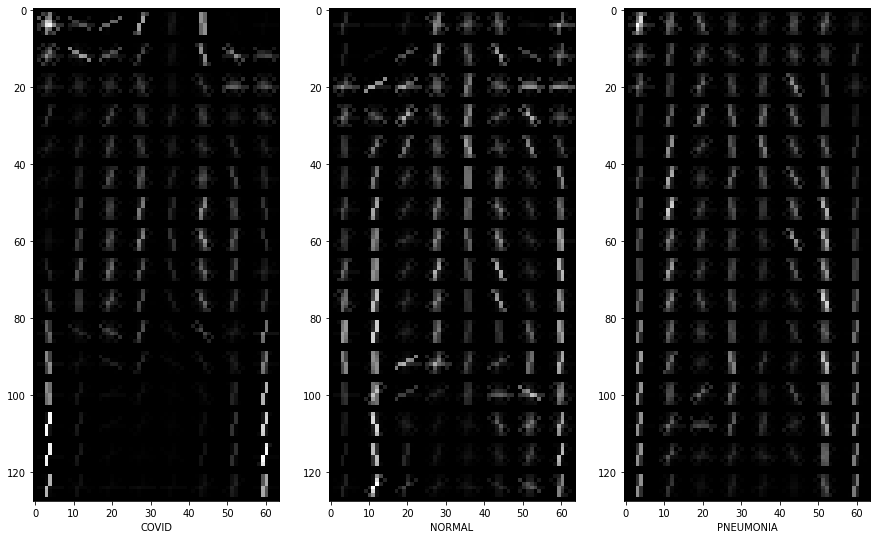

In [39]:
X_image = [hog_features[0], hog_features[12000], hog_features[14000]]


plt.figure(figsize=(15,15))
label = ['COVID', 'NORMAL'   , 'PNEUMONIA']
for i in range(3):
#     plt.title('HOG FEATURES')
    plt.subplot(1,3, i+1)
    plt.imshow(X_image[i], cmap='gray')
    plt.xlabel(label[i])


plt.show()

In [21]:
# X_hog = hog_features ///////////// CONVERTING HOG FEATURE TO NUMPY ARRAY IMAGES
X_hog = np.array(hog_features)

In [139]:
# SPLITTING THE DATSET INTO TRAINING AND TESTING DATA

In [22]:
from sklearn import model_selection 

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_hog, y, test_size=0.25, random_state=0 )

In [24]:
print('x train shape' , X_train.shape)
print('y train shape' , y_train.shape)
print('x test shape', X_test.shape)
print('y test shape', y_test.shape)

x train shape (11364, 128, 64)
y train shape (11364,)
x test shape (3789, 128, 64)
y test shape (3789,)


In [25]:
classes = 4

cnn_hog_model = tf.keras.Sequential([
    #   cnn and max pooling layer 1
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,64,1)),
    keras.layers.MaxPooling2D(),
    
    #   cnn and max pooling layer 2  
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    #   cnn and max pooling layer 3  
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
     #   cnn and max pooling layer 4  
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Dropout(0.5),
    
    # neuron network dense
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(classes, activation='softmax')
])



cnn_hog_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_hog_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 64, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 8, 64)        0

In [27]:
cnn_hog_model.fit(X_train, y_train, batch_size=64, epochs=16)

Epoch 1/16
178/178 [==============================] - 92s 486ms/step - loss: 0.6534 - accuracy: 0.7616
Epoch 2/16
178/178 [==============================] - 97s 544ms/step - loss: 0.3054 - accuracy: 0.8713
Epoch 3/16
178/178 [==============================] - 102s 576ms/step - loss: 0.2385 - accuracy: 0.9052
Epoch 4/16
178/178 [==============================] - 99s 558ms/step - loss: 0.1842 - accuracy: 0.9293
Epoch 5/16
178/178 [==============================] - 104s 583ms/step - loss: 0.1535 - accuracy: 0.9386
Epoch 6/16
178/178 [==============================] - 107s 599ms/step - loss: 0.1232 - accuracy: 0.9542
Epoch 7/16
178/178 [==============================] - 103s 579ms/step - loss: 0.1100 - accuracy: 0.9571
Epoch 8/16
178/178 [==============================] - 103s 577ms/step - loss: 0.0888 - accuracy: 0.9672
Epoch 9/16
178/178 [==============================] - 102s 571ms/step - loss: 0.0695 - accuracy: 0.9730
Epoch 10/16
178/178 [==============================] - 107s 601ms/s

In [28]:
cnn_hog_model.evaluate(X_test, y_test)

119/119 [==============================] - 10s 81ms/step - loss: 0.1597 - accuracy: 0.9520


[0.15965120494365692, 0.9519662261009216]

Classification report :                precision    recall  f1-score   support

           0       0.90      0.93      0.92       848
           1       0.97      0.96      0.97      2609
           2       0.91      0.97      0.94       332

    accuracy                           0.95      3789
   macro avg       0.93      0.95      0.94      3789
weighted avg       0.95      0.95      0.95      3789



<AxesSubplot:>

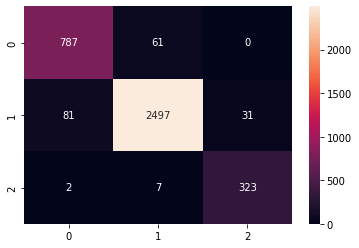

In [29]:
from sklearn import metrics 
import seaborn as sb
import pandas as pd

y_predict = cnn_hog_model.predict(X_test)
# np.argmax(y_predict[0])
y_predic = [np.argmax(prob) for prob in y_predict]

print("Classification report : " , metrics.classification_report(y_test, y_predic) )
cm =  metrics.confusion_matrix(y_test, y_predic)
lbl = ['Yes' , 'No']
dataframe = pd.DataFrame(cm)
sb.heatmap(dataframe, annot=True , fmt='d')

In [30]:
import matplotlib.pyplot as plt

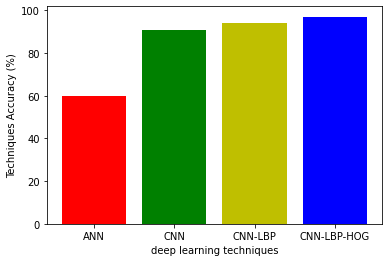

In [34]:
x =['ANN' , 'CNN', 'CNN-LBP', 'CNN-LBP-HOG']
y = [60, 91, 94, 95]

plt.xlabel('deep learning techniques')
plt.ylabel('Techniques Accuracy (%)')
plt.bar(x,y, color=['r', 'g', 'y', 'b'])
plt.show()